### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score



In [4]:
# Carga de datos: Usando el nombre de archivo exacto y el separador de tabulación (TSV)
df = pd.read_csv('./data/druglibtrain_raw.tsv', sep='\t')

print("Primeras 5 filas del DataFrame:")
print(df.head())
print("\nForma (filas, columnas) del DataFrame:")
print(df.shape)

Primeras 5 filas del DataFrame:
   Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was use

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [6]:
df["Unnamed: 0"].value_counts()

Unnamed: 0
2202    1
3117    1
1146    1
3947    1
1951    1
       ..
1039    1
3281    1
1664    1
2621    1
2748    1
Name: count, Length: 3107, dtype: int64

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [7]:
#eliminar unnamed. Es un index y no nos sirve
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
#eliminar strings de texto

df.drop(['benefitsReview', 'sideEffectsReview', 'commentsReview'], axis=1, inplace=True)

In [9]:
df

,urlDrugName,rating,effectiveness,sideEffects,condition
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia
...,...,...,...,...,...
3102,vyvanse,10,Highly Effective,Mild Side Effects,adhd
3103,zoloft,1,Ineffective,Extremely Severe Side Effects,depression
3104,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy
3105,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy


eliminar duplicados

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,urlDrugName,rating,effectiveness,sideEffects,condition
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia
...,...,...,...,...,...
3100,accutane,7,Considerably Effective,Mild Side Effects,acne
3101,diazepam,8,Considerably Effective,No Side Effects,muscle relaxant - spinal disorder
3102,vyvanse,10,Highly Effective,Mild Side Effects,adhd
3104,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2910 entries, 0 to 3105
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   urlDrugName    2910 non-null   object
 1   rating         2910 non-null   int64 
 2   effectiveness  2910 non-null   object
 3   sideEffects    2910 non-null   object
 4   condition      2909 non-null   object
dtypes: int64(1), object(4)
memory usage: 136.4+ KB


eliminar nulos

In [13]:
df.isnull().sum()

urlDrugName      0
rating           0
effectiveness    0
sideEffects      0
condition        1
dtype: int64

In [14]:
df.dropna(inplace=True)

comprobar cuantas categorias hay

In [16]:
df['urlDrugName'].value_counts()

urlDrugName
lexapro             51
retin-a             43
zoloft              39
paxil               36
prozac              34
                    ..
desonide             1
nasacort-aq          1
glucophage-xr        1
risperdal-consta     1
trileptal            1
Name: count, Length: 502, dtype: int64

In [17]:
df['effectiveness'].value_counts()

effectiveness
Highly Effective          1208
Considerably Effective     879
Moderately Effective       401
Ineffective                240
Marginally Effective       181
Name: count, dtype: int64

In [18]:
df['sideEffects'].value_counts()

sideEffects
Mild Side Effects                927
No Side Effects                  857
Moderate Side Effects            591
Severe Side Effects              362
Extremely Severe Side Effects    172
Name: count, dtype: int64

In [19]:
df['condition'].value_counts()

condition
depression                           179
acne                                 141
anxiety                               60
insomnia                              47
birth control                         42
                                    ... 
low back pain due to car accident      1
chronic severe insomnia                1
fibromyalgia pain                      1
atopic eczema                          1
unusual periods                        1
Name: count, Length: 1426, dtype: int64

In [21]:
df_cluster = df.copy()

In [22]:
df_cluster.drop(['urlDrugName', 'condition'], axis=1, inplace=True)

In [23]:
df_cluster

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects
...,...,...,...
3100,7,Considerably Effective,Mild Side Effects
3101,8,Considerably Effective,No Side Effects
3102,10,Highly Effective,Mild Side Effects
3104,2,Marginally Effective,Moderate Side Effects


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [24]:
df_dummies = pd.get_dummies(df_cluster, drop_first=True)

In [25]:
print("\nPrimeras 5 filas del DataFrame de clustering codificado (df_dummies.head()):")
print(df_dummies.head())
print("\nForma final del DataFrame de clustering (df_dummies.shape):")
print(df_dummies.shape)


Primeras 5 filas del DataFrame de clustering codificado (df_dummies.head()):
   rating  effectiveness_Highly Effective  effectiveness_Ineffective  \
0       4                            True                      False   
1       1                            True                      False   
2      10                            True                      False   
3       3                           False                      False   
4       2                           False                      False   

   effectiveness_Marginally Effective  effectiveness_Moderately Effective  \
0                               False                               False   
1                               False                               False   
2                               False                               False   
3                                True                               False   
4                                True                               False   

   sideEffects_Mild Side E

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [26]:
scaler = StandardScaler()

In [27]:
X_scaled = scaler.fit_transform(df_dummies)

In [28]:
df_scaled = pd.DataFrame(X_scaled, columns=df_dummies.columns)

In [29]:
df_scaled

,rating,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,-0.981535,1.186639,-0.299869,-0.257583,-0.39986,1.462217,-0.504937,-0.646252,-0.376999
1,-1.993688,1.186639,-0.299869,-0.257583,-0.39986,-0.683893,-0.504937,-0.646252,2.652529
2,1.042772,1.186639,-0.299869,-0.257583,-0.39986,-0.683893,-0.504937,1.547385,-0.376999
3,-1.318919,-0.842716,-0.299869,3.882245,-0.39986,1.462217,-0.504937,-0.646252,-0.376999
4,-1.656304,-0.842716,-0.299869,3.882245,-0.39986,-0.683893,-0.504937,-0.646252,2.652529
...,...,...,...,...,...,...,...,...,...
2904,0.030619,-0.842716,-0.299869,-0.257583,-0.39986,1.462217,-0.504937,-0.646252,-0.376999
2905,0.368003,-0.842716,-0.299869,-0.257583,-0.39986,-0.683893,-0.504937,1.547385,-0.376999
2906,1.042772,1.186639,-0.299869,-0.257583,-0.39986,1.462217,-0.504937,-0.646252,-0.376999
2907,-1.656304,-0.842716,-0.299869,3.882245,-0.39986,-0.683893,1.980446,-0.646252,-0.376999


In [41]:
silhouette_scores = {}
K_range = range(2, 11)
results = []

In [42]:
for k in K_range:
  kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
  cluster_labels = kmeans_model.fit_predict(df_scaled)
  score = silhouette_score(df_scaled, cluster_labels)
  results.append(f"K={k}: {score:.4f}")

In [43]:
results

['K=2: 0.2751',
 'K=3: 0.3063',
 'K=4: 0.4185',
 'K=5: 0.4497',
 'K=6: 0.5014',
 'K=7: 0.5441',
 'K=8: 0.5702',
 'K=9: 0.6095',
 'K=10: 0.6040']

#### Genera el K Means 

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [51]:
final_kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(df_scaled)

In [52]:
df['cluster'] = cluster_labels.astype(int)

In [53]:
df

,urlDrugName,rating,effectiveness,sideEffects,condition,cluster
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,7
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,0
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,6
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,5
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,5
...,...,...,...,...,...,...
3100,accutane,7,Considerably Effective,Mild Side Effects,acne,2
3101,diazepam,8,Considerably Effective,No Side Effects,muscle relaxant - spinal disorder,1
3102,vyvanse,10,Highly Effective,Mild Side Effects,adhd,7
3104,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,5


In [54]:
print("--- Distribución REAL de registros por cluster ---")
print(df['cluster'].value_counts().sort_index())

--- Distribución REAL de registros por cluster ---
cluster
0    236
1    326
2    356
3    240
4    408
5    181
6    468
7    437
8    257
Name: count, dtype: int64


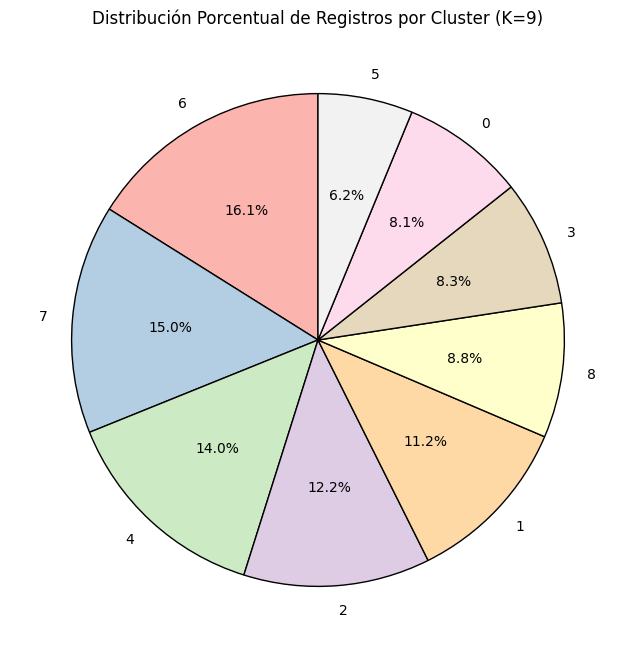

In [55]:
plt.figure(figsize=(8, 8))
df['cluster'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1',
                                      wedgeprops={'edgecolor': 'black'},
                                      title='Distribución Porcentual de Registros por Cluster (K=9)')
plt.ylabel('')
plt.show()